## 8. EDOs de 2ª ordem com SymPy



### 8.1 Introdução

Uma boa razão para estudar equações lineares de segunda ordem é que elas são essenciais para qualquer investigação séria das áreas clássicas da Física-Matemática. Não se pode progredir muito no estudo de mecânica dos fluidos, condução de calor, movimento ondulatório ou fenômenos eletromagnéticos sem esbarrar na necessidade de resolver equações diferenciais lineares de segunda ordem. Vamos ilustrar isso mais a frente com uma discussão de oscilações de alguns sistemas mecânicos e elétricos básicos.


Considere um pêndulo de comprimento $l$, com massa $m$ em sua extremidade, como ilustrado na figura abaixo. 

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2004%20-%20EDOs%20de%201%C2%AA%20ordem,%20solu%C3%A7%C3%A3o%20e%20campo%20de%20dire%C3%A7%C3%B5es/imagens/pendulo.png?raw=true" width="100"/>

O ângulo que o pêndulo faz com o eixo vertical ao longo do tempo, $\theta (t)$ na presença de gravidade vertical $g$ pode ser descrito pela equação do pêndulo, que é a EDO

$$
ml\frac{d^2\theta(t)}{dt^2} = -mg \, sen(\theta(t)).
$$

Esta equação pode ser deduzida somando as forças nas direções $x$
e $y$ e, em seguida, mudando para coordenadas polares.

Essa é uma equação não linear de difícil solução mas pode ser simplificada assumindo que os ângulos são muito pequenos (ou seja, $sen(\theta(t) \approx \theta(t)$, então a equação do pêndulo se reduz a

$$
l\frac{d^2\theta(t)}{dt^2} = -g\theta(t).
$$

e a solução geral $\theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)$ pode ser obtida. Para um ângulo inicial $\theta_0$, partindo do repouso no instante $t=0$, obtém-se a solução particular 

$$\theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right)$$

Para verificar, basta calcular as derivadas de 1ª e 2ª ordens e substituir na equação

**Exemplo 8.1:** Vamos verificar se $\theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)$ é solução da equação 

$$
l\frac{d^2\theta(t)}{dt^2} = -g\theta(t)
$$


In [4]:
import sympy as sp

In [5]:
# definido os símbolos
t,g,l = sp.symbols('t,g,l') 

In [6]:
# entrando com a função theta
theta = sp.cos(sp.sqrt(g/l)*t)

In [7]:
# lado esquerdo da equação (derivada segunda)
l*theta.diff(t, t)

-g*cos(t*sqrt(g/l))

In [8]:
# lado direito
-g*theta

-g*cos(t*sqrt(g/l))

In [9]:
# lado direito
-g*theta

-g*cos(t*sqrt(g/l))

Podemos ver que que a função $\theta(t)$ satisfaz a equação, pois derivando duas vezes e substituindo, o lado direito e o lado esquerdo da equação são inguais.

A seguir mais alguns exemplos de como usar `sympy`para exibir expressões matemáticas em um formato matemático tradicional. 

In [10]:
# definido o símbolo theta para a função
theta_symbol = sp.Function('theta')(t) 

In [11]:
# exibindo uma equação para a derivada primeira
sp.Eq(theta_symbol.diff(t), theta.diff(t))

Eq(Derivative(theta(t), t), -sqrt(g/l)*sin(t*sqrt(g/l)))

In [12]:
#exibindo uma equação para a derivada segunda
sp.Eq(theta_symbol.diff(t,t), theta.diff(t,t))

Eq(Derivative(theta(t), (t, 2)), -g*cos(t*sqrt(g/l))/l)

Observe o que ocorre se entramos com a equação de forma simbólica:

In [13]:
sp.Eq(l*theta.diff(t,t), -g*theta)

True

O resultado acima confirma que a função $\theta(t)$ dada é realmente solução da equação do pêndulo.

### 8.2 Equações diferenciais homogêneas com coeficientes constantes

As equações diferenciais homogêneas com coeficientes constantes e de 2ª ordem são aquelas que podem ser escritas na forma 

$$ay''+by'+cy=0$$

com $a$, $b$ e $c$ constantes.

Sabemos que se a equação característica $ar^2+br+c=0$ possuir **duas raízes reais e distintas** $r_ 1$ e $r_2$, em que $r_1 \neq r_2$, então  $y_1(t)=e^{r_1t}$ e $y_2(t)=e^{r_2t}$ são duas soluções da equação diferencial. Além disso, a combinação linear dessas duas soluções, ou seja, a função

$$ y = c_1e^{r_1t} + c_2e^{r_2t}$$

também é uma solução (confira!).   

Se estivermos interessados em um elemento particular da família de soluções que satisfaz as condições iniciais 

$$y(t_0)=y_0 \,\,\,\, \text{e}\,\,\,\, y'(t_0)=y'_0$$  

então, substituimos na equação e podemos obter

$$c_1=\frac{y'_0-y_0r_2}{r_1-r_2}e^{-r_1t_0}\,\,\,\, \text{e}\,\,\,\,c_2=\frac{y_0r_1-y'_0}{r_1-r_2}e^{-r_2t_0}$$


**Exemplo 8.2:** Encontre a solução do problema de valor inicial

$$y''+5y'+6y=0  \, \text{,}\,\, y(0)=2 \,\, \text{e}\,\, y'(0)=3$$ 

_Solução:_ 

As raízes de $r^2+5r+6=0$ são $r_1=-2$ e $r_2=-3$. Então a solução geral da equação é

$$ y = c_1e^{-2t}+c_2e^{⁻3t}$$

Aplicando a primeira condição inicial $y(0)=2$ obtemos $c_1+c_2=2$. 

Aplicando a segunda condição inicial $y'(0)=3$ obtemos $-2c_1-3c_2=3$.

Resolvendo o sistema linear formado por essas duas equações obtemse $c_1=9$ e $c_2=-7$, então a solução particular é 

$$y=9e^{-2t}-7e^{-3t}$$

Vejamos agora como usar as bibliotecas computacionais para obter essa solução.

In [14]:
import sympy as sp

In [15]:
r, c1, c2 = sp.symbols('r, c1, c2')

In [16]:
#resolvendo a equação característica 
sp.solve(r**2+5*r+6)

[-3, -2]

In [17]:
#escrevendo a solução geral
t = sp.symbols('t')
y = sp.Function('y')(t)
y = c1*sp.exp(-2*t)+c2*sp.exp(-3*t)
y

c1*exp(-2*t) + c2*exp(-3*t)

In [18]:
# verificando a solução
sp.simplify(y.diff(t,t)+ 5*y.diff(t)+6*y)

0

In [19]:
dy = sp.lambdify(t, y.diff(t))
y = sp.lambdify(t, y)

In [20]:
y(0)

1.0*c1 + 1.0*c2

In [21]:
eq1 = sp.Eq(y(0),2)
eq2 = sp.Eq(dy(0),3)

In [22]:
C = sp.solve([eq1,eq2])
C

{c1: 9.00000000000000, c2: -7.00000000000000}

In [23]:
s_part = C[c1]*sp.exp(-2*t)+C[c2]*sp.exp(-3*t)
s_part

9.0*exp(-2*t) - 7.0*exp(-3*t)

O mesmo resultado poderia ser obtido fazendo simplesmente

In [24]:
y = sp.Function('y')(t)
eq = y.diff(t,t)+5*y.diff(t)+6*y
sp.dsolve(eq, y)

Eq(y(t), (C1 + C2*exp(-t))*exp(-2*t))

Para adicionar condições iniciais, podemos complementar o comando adicionando `ics={y(0): 2, y.diff(t).subs(t, 0): 3}` dentro do `dsolve`

In [25]:
sol = sp.dsolve(eq, y, ics={y.subs(t, 0):2, y.diff(t).subs(t, 0): 3})
sol

Eq(y(t), (9 - 7*exp(-t))*exp(-2*t))

Plotando a solução particular

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(4,3)

In [26]:
# sol.rhs é o lado direito da equação sol
f = sp.lambdify(t,sol.rhs)

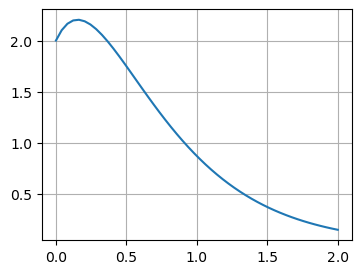

In [27]:
t = np.linspace(0,2)
plt.plot(t, f(t))
plt.grid()
plt.show()

**Curiosidade:** O que acontece se eu plotar várias cuvas para várias soluções?

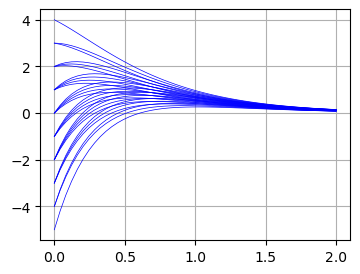

In [28]:
f = lambda t,c1,c2: (c1-c2*np.exp(-t))*np.exp(-2*t)
for c1 in np.arange(6,10):
    for c2 in np.arange(5,12):
        plt.plot(t, f(t,c1,c2),'b-',lw=0.5)
plt.grid()
plt.show()

Se a equação característica $ar^2+br+c=0$ possuir **raízes complexas conjugadas** $r_ 1 = \lambda + i\mu$ e $r_2 = \lambda - i\mu$, então a solução geral da equação diferencial é a função


$$ y = c_1 e^{\lambda t} cos(\mu t)+c_2 e^{\lambda t} sen(\mu t)$$

**Exemplo 8.3:** Encontre a solução do problema de valor inicial $16y"-8y'+145y=0$, $y(0)=-2$ e $y'(0)=1$.

In [29]:
t = sp.symbols('t')
y = sp.Function('y')(t)
eq = 16*y.diff(t,t)-8*y.diff(t)+145*y
sol_g = sp.dsolve(eq, y)
sol_g

Eq(y(t), (C1*sin(3*t) + C2*cos(3*t))*exp(t/4))

In [30]:
sol_p = sp.dsolve(eq, y, ics={y.subs(t, 0):-2, y.diff(t).subs(t, 0): 1})
sol_p

Eq(y(t), (sin(3*t)/2 - 2*cos(3*t))*exp(t/4))

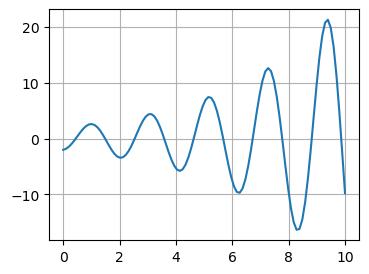

In [31]:
f = sp.lambdify(t,sol_p.rhs)
t = np.linspace(0,10,100)
plt.plot(t, f(t))
plt.grid()
plt.show()

In [32]:
display(sol_g.rhs)

(C1*sin(3*t) + C2*cos(3*t))*exp(t/4)

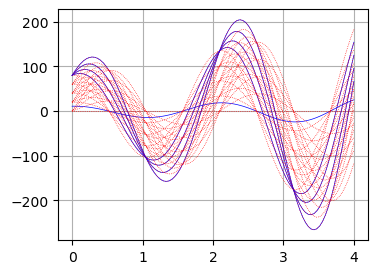

In [33]:
sols = lambda t,c1,c2: (c1*np.sin(3*t) + c2*np.cos(3*t))*np.exp(t/4)
t = np.linspace(0,4,100)

for c1 in range(0,100,20):
    plt.plot(t, sols(t, c1,c2), 'b-', lw=0.5)
    for c2 in range(0,100,20):
        plt.plot(t, sols(t, c1,c2), 'r:', lw=0.5)
plt.grid()
plt.show()

**Exemplo 8.4:** Encontre a solução do problema de valor inicial $y"+9y'=0$.

In [34]:
t = sp.symbols('t')
y = sp.Function('y')(t)
eq = y.diff(t,t)+9*y
sol_g = sp.dsolve(eq, y)
sol_g

Eq(y(t), C1*sin(3*t) + C2*cos(3*t))

In [35]:
print(sol_g.rhs)

C1*sin(3*t) + C2*cos(3*t)


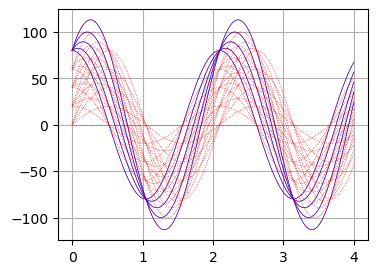

In [36]:
sols = lambda t,C1,C2: C1*np.sin(3*t) + C2*np.cos(3*t)
t = np.linspace(0,4,100)

for c1 in range(0,100,20):
    plt.plot(t, sols(t, c1,c2), 'b-', lw=0.5)
    for c2 in range(0,100,20):
        plt.plot(t, sols(t, c1,c2), 'r:', lw=0.5)
plt.grid()
plt.show()

Por fim, se a equação característica $ar^2+br+c=0$ possuir **raízes iguais** $r_1 = r_2$, então a solução geralé dada por 

$$ y = c_1e^{r_1t}+c_2 t e^{r_2t}$$

**Exemplo 8.5:**
Encontre a solução do problema de valor inicial $y"-y'+0.25y=0$, $y(0)=2$ e $y'(0)=1/3$.

In [37]:
t = sp.symbols('t')
y = sp.Function('y')(t)
eq = y.diff(t,t)-y.diff(t)+0.25*y
sp.dsolve(eq, y)


Eq(y(t), C1*exp(0.499999999999937*t) + C2*exp(0.500000000000057*t))

Ops! Aqui parece que algo não deu certo, o que será??? 

In [38]:
#resolvendo a equação característica 
sp.solve(r**2-r+0.25)

[0.500000000000000]

Raízes iguais!!! A solução geral é $y(t) = C_1 e^{0.5t} + C_2te^{0.5t}$

A solução geral para equações não homogêneas $ay"+by'+cy=g(t)$ obtida pelo **método dos coeficientes indeterminados** tem a forma $y(t)=c_1y_1(t)+c_2y_2(t)+Y(t)$ onde $y_1$ e $y_2$ são as soluções da equação homogênea associada e $Y(t)$ é alguma solução específica da equação não homogênea. 

A função $Y(t)$ pode ser encontrada calculando coeficientes de uma combinação linear de funções exponenciais, seno, cosseno, polinômios, somas ou produtos dessas funções dependendo da forma da  função $g(t)$. 

Os exemplos a seguir dão um panorama de como proceder para obter uma solução geral.


**Exemplo 8.6:** Encontre uma solução particular $Y(t)$ para $y"-3y'-4y=3e^{2t}$. Então escreva a solução geral.

Fazendo $Y(t)=Ae^{2t}$ derivando e substituindo no lado esquerdo da equação, temos:

In [39]:
A = sp.symbols('A')
Y = sp.Function('Y')(t)
Y = A*sp.exp(2*t) 
expr = Y.diff(t,t)-3*Y.diff(t)-4*Y
expr

-6*A*exp(2*t)

Igualando com o lado direito da equação, ou sejan fazendo $-6Ae^{2t} = 3e^{2t}$ tem-se que $A=-1/2$, portanto $Y(t) = -\frac{1}{2}e^{2t}$. Resolvendo a equação característica:

In [40]:
r = sp.symbols('r')
sp.solve(r**2-3*r-4)

[-1, 4]

Escrevemos a solução geral como $y(t) = C_1e^{-t}+C_2e^{4t}-\frac{1}{2}e^{2t}$. Podemos confirmar a solução obtida usando os comandos abaixo:


In [41]:
eq = y.diff(t,t)-3*y.diff(t)-4*y-3*sp.exp(2*t)
sp.dsolve(eq, y)

Eq(y(t), C1*exp(-t) + C2*exp(4*t) - exp(2*t)/2)

**Exemplo 8.7:** Encontre uma solução particular $Y(t)$ para $y"-3y'-4y=2sen(t)$. Então escreva a solução geral.

Fazendo $Y(t)=Asen(t) + Bcos(t)$ derivando e substituindo no lado esquerdo da equação, temos:

In [42]:
A, B = sp.symbols('A, B')
Y = sp.Function('Y')(t)
Y = A*sp.sin(t) + B*sp.cos(t)
expr = Y.diff(t,t)-3*Y.diff(t)-4*Y
expr

-4*A*sin(t) - 3*A*cos(t) + 3*B*sin(t) - 4*B*cos(t) - (A*sin(t) + B*cos(t))

Fatorando para colocar $cos(t)$ e $sen(t)$ em evidência

In [43]:
fact = sp.factor(expr, [sp.cos(t), sp.sin(t)])
fact

-(3*A + 5*B)*cos(t) - (5*A - 3*B)*sin(t)

In [44]:
eq1 = sp.Eq(-3*A-5*B, 0)
eq2 = sp.Eq(-5*A+3*B, 2)

In [45]:
sp.solve([eq1,eq2])

{A: -5/17, B: 3/17}

Escrevemos a solução geral como $y(t) = C_1e^{-t}+C_2e^{4t}-\frac{5}{17}sen(t)+\frac{3}{17}cos(t)$. Podemos confirmar a solução obtida usando os comandos abaixo:

In [46]:
eq = y.diff(t,t)-3*y.diff(t)-4*y-2*sp.sin(t)
sp.dsolve(eq, y)

Eq(y(t), C1*exp(-t) + C2*exp(4*t) - 5*sin(t)/17 + 3*cos(t)/17)

**Exemplo 8.8:** Use o método dos coeficientes indeterminados para encontrar uma solução particular $Y(t)$ para $y"-3y'-4y=-8e^tcos(2t)$. Então escreva a solução geral.

In [47]:
# A resposta procurada é dada por 
eq = y.diff(t,t)-3*y.diff(t)-4*y-8*sp.exp(t)*sp.cos(2*t)
sp.dsolve(eq, y)

Eq(y(t), C1*exp(-t) + C2*exp(4*t) + 2*(-sin(2*t) - 5*cos(2*t))*exp(t)/13)

**Exemplo 8.9:** Use o método dos coeficientes indeterminados para encontrar uma solução particular $Y(t)$ para $y"-3y'-4y=3e^{2t}+2sen(t)-8e^tcos(2t)$. Então escreva a solução geral.

In [48]:
# A resposta procurada é dada por 
eq = y.diff(t,t)-3*y.diff(t)-4*y-3*sp.exp(2*t)+2*sp.sin(t)-8*sp.exp(t)*sp.cos(2*t)
sp.dsolve(eq, y)

Eq(y(t), C1*exp(-t) + C2*exp(4*t) + 2*(-sin(2*t) - 5*cos(2*t))*exp(t)/13 - exp(2*t)/2 + 5*sin(t)/17 - 3*cos(t)/17)

**Exercícios:**

**1.** Encontre a solução geral da equação diferencial dada. Esboce o gráfico para algumas soluções.

a) $y^{\prime \prime}+2 y^{\prime}-3 y=0$

b) $y^{\prime \prime}+3 y^{\prime}+2 y=0$

c) $6 y^{\prime \prime}-y^{\prime}-y=0$

d) $y^{\prime \prime}+5 y^{\prime}=0$

e) $4 y^{\prime \prime}-9 y=0$

f) $y^{\prime \prime}-2 y^{\prime}-2 y=0$

g) $y^{\prime \prime}-2 y^{\prime}+2 y=0$

h) $y^{\prime \prime}-2 y^{\prime}+6 y=0$

i) $y^{\prime \prime}+2 y^{\prime}+2 y=0$

j) $y^{\prime \prime}+6 y^{\prime}+13 y=0$

k) $y^{\prime \prime}+2 y^{\prime}+1,25 y=0$

l)  $9 y^{\prime \prime}+9 y^{\prime}-4 y=0$

m) $y^{\prime \prime}+4 y^{\prime}+6,25 y=0$

n)  $y^{\prime \prime}-2 y^{\prime}+y=0$

o) $9 y^{\prime \prime}+6 y^{\prime}+y=0$

p) $4 y^{\prime \prime}-4 y^{\prime}-3 y=0$

q) $y^{\prime \prime}-2 y^{\prime}+10 y=0$

r) $y^{\prime \prime}-6 y^{\prime}+9 y=0$

s) $4 y^{\prime \prime}+17 y^{\prime}+4 y=0$

t) $16 y^{\prime \prime}+24 y^{\prime}+9 y=0$

u) $2 y^{\prime \prime}+2 y^{\prime}+y=0$

**2.** Encontre a solução do problema de valor inicial dado. Esboce o gráfico da solução e descreva seu comportamento quando $t$ aumenta.

a) $y^{\prime \prime}+y^{\prime}-2 y=0, \quad y(0)=1, \quad y^{\prime}(0)=1$

b) $y^{\prime \prime}+4 y^{\prime}+3 y=0, \quad y(0)=2, \quad y^{\prime}(0)=-1$

c) $y^{\prime \prime}+3 y^{\prime}=0, \quad y(0)=-2, \quad y^{\prime}(0)=3$

d) $2 y^{\prime \prime}+y^{\prime}-4 y=0, \quad y(0)=0, \quad y^{\prime}(0)=1$

e) $y^{\prime \prime}+8 y^{\prime}-9 y=0, \quad y(1)=1, \quad y^{\prime}(1)=0$

f) $4 y^{\prime \prime}-y=0, \quad y(-2)=1, \quad y^{\prime}(-2)=-1$

g) $y^{\prime \prime}+4 y=0, \quad y(0)=0, \quad y^{\prime}(0)=1$

h) $y^{\prime \prime}-2 y^{\prime}+5 y=0, \quad y(\pi / 2)=0, \quad y^{\prime}(\pi / 2)=2$

i) $y^{\prime \prime}+y=0, \quad y(\pi / 3)=2, \quad y^{\prime}(\pi / 3)=-4$

j) $y^{\prime \prime}+2 y^{\prime}+2 y=0, \quad y(\pi / 4)=2, \quad y^{\prime}(\pi / 4)=-2$

k)  $9 y^{\prime \prime}-12 y^{\prime}+4 y=0, \quad y(0)=2, \quad y^{\prime}(0)=-1$

l)  $y^{\prime \prime}-6 y^{\prime}+9 y=0, \quad y(0)=0, \quad y^{\prime}(0)=2$

m) $y^{\prime \prime}+4 y^{\prime}+4 y=0, \quad y(-1)=2, \quad y^{\prime}(-1)=1$